# CONFLUENCE Tutorial - 6: Regional Domain Modeling (Iceland)

## Introduction
This tutorial marks a fundamental shift in scale and approach from single-watershed modeling to regional domain modeling. Instead of focusing on one watershed draining to a single outlet, we now model an entire region containing multiple independent drainage systems. Using Iceland as our example, we demonstrate how CONFLUENCE handles complex regional hydrology including coastal watersheds, multiple drainage basins, and diverse hydrological regimes within a single integrated modeling framework.

## Regional Domain Modeling Philosophy
Regional domain modeling treats an entire geographic region such as a country, province, or large administrative area as the modeling domain, fundamentally departing from traditional watershed-centric approaches. This methodology encompasses multiple independent watersheds within the domain, including coastal watersheds that drain directly to ocean boundaries rather than to interior confluence points. The approach enables comprehensive regional water resources assessment by providing understanding of water availability patterns across entire geographic regions while simultaneously addressing diverse hydrological conditions including multiple climate zones, varied topographic settings, and contrasting hydrological regimes within a unified analytical framework.

The conceptual differences between watershed and regional modeling are substantial and fundamental. Drainage patterns shift from single outlet points to multiple independent outlets, while domain boundaries transition from topographic divides to administrative or geographic boundaries. Spatial scales expand from tens or thousands of square kilometers to tens of thousands or hundreds of thousands of square kilometers. Outlet systems evolve from rivers and streams to include both riverine systems and coastal discharge points. The analytical purpose advances from basin-specific studies to comprehensive regional water resources assessment and management.

## Case Study: Iceland Regional Analysis
Iceland provides an exceptional case study for regional modeling through its unique combination of geographic characteristics, hydrological diversity, and practical advantages for comprehensive analysis. The island nation offers clear regional boundaries with diverse drainage systems spanning approximately 103,000 square kilometers, creating a manageable demonstration scale that remains large enough to illustrate regional concepts effectively. The volcanic landscape creates complex topography that generates numerous independent watersheds, while the clear geographic boundaries of the island setting eliminate the boundary condition complexities that complicate continental regional studies.

The hydrological diversity of Iceland encompasses glacial systems with ice-dominated watersheds that exhibit unique hydrological behaviors, volcanic terrain with permeable basalts that significantly affect groundwater flow patterns, coastal climate zones with maritime influences that create strong seasonal variations, and elevation gradients ranging from sea level to over 2000 meters that drive diverse hydrological responses. This diversity enables demonstration of regional modeling capabilities across fundamentally different hydrological regimes within a single coherent framework.

Practical advantages include excellent data availability with good coverage of meteorological and topographic datasets, computational feasibility that balances demonstration scale with local execution capabilities, and clear boundary definition through the island setting that eliminates complex boundary condition specifications required for continental applications.

## Technical Implementation Framework
Regional modeling requires several key technical approaches that distinguish it from traditional watershed-specific methods. Bounding box delineation defines the region using geographic coordinates rather than pour point specifications, enabling comprehensive coverage of administrative or natural regions. Coastal watershed inclusion captures watersheds that drain directly to ocean boundaries, ensuring complete regional water accounting. Multiple drainage system handling accommodates independent watersheds without requiring upstream-downstream connectivity assumptions. Regional forcing application distributes meteorological data across diverse topographic and climate conditions while maintaining spatial coherence and physical realism.

Critical configuration parameters undergo substantial modification for regional applications. Domain setup parameters change to disable pour point delineation in favor of bounding box definitions, specify regional extents rather than watershed-specific coordinates, and enable coastal watershed inclusion to capture ocean-draining basins. Computational considerations require higher stream threshold values to manage the increased complexity of regional stream networks, careful balance between spatial resolution detail and computational feasibility, and appropriate planning for extended processing times due to regional scale demands.

## Learning Objectives and Tutorial Structure
Through this tutorial, you will master the fundamental principles of scaling hydrological modeling from individual watersheds to comprehensive regions, understand the technical requirements and implementation strategies for regional domain modeling, develop capabilities for handling multiple independent drainage systems within unified frameworks, comprehend the scientific applications and policy relevance of regional-scale hydrology, and appreciate the computational and data management challenges inherent in large-scale modeling applications.

This tutorial represents the largest spatial scale in our notebook series yet, and demonstrates CONFLUENCE's capability to handle complex regional hydrology while maintaining the same workflow efficiency and scientific rigor established in smaller-scale applications. The methodological foundation established here directly enables the continental-scale applications and large-sample studies that follow in subsequent tutorials.

## Step 1: Regional Domain Setup with Multi-Watershed Configuration
This tutorial marks a shift from watershed-scale to regional-scale hydrological modeling. Moving beyond the single-watershed focus of our previous tutorials, we now model an entire region containing multiple independent drainage systems. Using Iceland as our case study, we demonstrate how CONFLUENCE scales from basin-specific modeling to comprehensive regional water resources assessment across diverse hydrological regimes.

The same CONFLUENCE framework seamlessly scales from single-watershed to regional modeling while maintaining workflow consistency and scientific rigor across this dramatic increase in spatial scope and hydrological complexity.


In [1]:
# Import the libraries we'll need in this notebook
import sys
import os
from pathlib import Path
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from shapely.geometry import box
import contextily as cx
from datetime import datetime
import xarray as xr
import warnings
from matplotlib.patches import Rectangle
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from sklearn.metrics import mean_squared_error
from matplotlib.gridspec import GridSpec

# Suppress specific warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Add CONFLUENCE to path
confluence_path = Path('../').resolve()
sys.path.append(str(confluence_path))

# Import CONFLUENCE
from CONFLUENCE import CONFLUENCE

# Set up plotting style
plt.style.use('default')
%matplotlib inline

# =============================================================================
# CONFIGURATION FOR REGIONAL ICELAND MODELING
# =============================================================================

# Set directory paths
CONFLUENCE_CODE_DIR = confluence_path
CONFLUENCE_DATA_DIR = Path('/Users/darrieythorsson/compHydro/data/CONFLUENCE_data')  # ← Update this path
#CONFLUENCE_DATA_DIR = Path('/path/to/your/CONFLUENCE_data') 

# Verify paths exist
if not CONFLUENCE_CODE_DIR.exists():
    raise FileNotFoundError(f"CONFLUENCE code directory not found: {CONFLUENCE_CODE_DIR}")

if not CONFLUENCE_DATA_DIR.exists():
    print(f"Data directory doesn't exist. Creating: {CONFLUENCE_DATA_DIR}")
    CONFLUENCE_DATA_DIR.mkdir(parents=True, exist_ok=True)

# Load Iceland configuration from template
iceland_config_path = CONFLUENCE_CODE_DIR / '0_config_files' / 'config_Iceland.yaml'
with open(iceland_config_path, 'r') as f:
    config_dict = yaml.safe_load(f)

# Update for tutorial-specific settings
config_updates = {
    'CONFLUENCE_CODE_DIR': str(CONFLUENCE_CODE_DIR),
    'CONFLUENCE_DATA_DIR': str(CONFLUENCE_DATA_DIR),
    'DOMAIN_NAME': 'Iceland',
    'EXPERIMENT_ID': 'regional',
    'EXPERIMENT_TIME_START': '2011-01-01 01:00',
    'EXPERIMENT_TIME_END': '2013-12-31 23:00',  # Shorter period for tutorial efficiency
}

config_dict.update(config_updates)

# Save tutorial configuration
tutorial_config_path = CONFLUENCE_CODE_DIR / '0_config_files' / 'config_iceland_tutorial.yaml'
with open(tutorial_config_path, 'w') as f:
    yaml.dump(config_dict, f, default_flow_style=False, sort_keys=False)

print(f"✅ Regional Iceland configuration saved: {tutorial_config_path}")

# Initialize CONFLUENCE with tutorial config
confluence = CONFLUENCE(tutorial_config_path)

# Initialize project directory structure
project_dir = confluence.managers['project'].setup_project()

# For regional modeling, we still need a pour point file for technical reasons,
# but it won't be used for actual delineation
pour_point_path = confluence.managers['project'].create_pour_point()

print(f"   📁 Project directory: {project_dir}")


✅ Regional Iceland configuration saved: /Users/darrieythorsson/compHydro/code/CONFLUENCE/0_config_files/config_iceland_tutorial.yaml

13:30:01 │ ============================================================
13:30:01 ● CONFLUENCE Logging Initialized
13:30:01 ● Domain: Iceland
13:30:01 ● Experiment ID: regional
13:30:01 ● Log Level: INFO
13:30:01 ● Log File: /Users/darrieythorsson/compHydro/data/CONFLUENCE_data/domain_Iceland/_workLog_Iceland/confluence_general_Iceland_20250828_133001.log

13:30:01 │ ============================================================
13:30:01 ● Configuration logged to: /Users/darrieythorsson/compHydro/data/CONFLUENCE_data/domain_Iceland/_workLog_Iceland/config_Iceland_20250828_133001.yaml
13:30:01 ● Initializing CONFLUENCE system
13:30:01 ● Configuration loaded from: /Users/darrieythorsson/compHydro/code/CONFLUENCE/0_config_files/config_iceland_tutorial.yaml
13:30:01 ● Initializing VariableHandler for dataset: ERA5 and model: SUMMA
13:30:01 ● CONFLUENCE system i

## Step 2: Regional Multi-Watershed Delineation and Coastal Integration
The transition to regional modeling requires a fundamentally different approach to domain delineation. Instead of tracing upstream from a single pour point, we now identify all independent drainage systems within a geographic region, including the critical inclusion of coastal watersheds that drain directly to ocean boundaries. This represents a paradigm shift from watershed-centric to region-centric hydrological analysis.
### Scientific Context: Regional Drainage System Analysis
Regional multi-watershed delineation operates on fundamentally different principles compared to traditional watershed-specific approaches. Bounding box definition establishes geographic region boundaries based on administrative or natural regional limits rather than topographic watershed constraints, enabling comprehensive coverage of entire administrative units or natural regions. Independent drainage systems are accommodated within a single modeling framework, allowing multiple unconnected watersheds to be analyzed simultaneously without requiring artificial connectivity assumptions. Coastal watershed integration becomes critically important as many basins drain directly to ocean boundaries rather than to inland confluence points, necessitating explicit inclusion of these ocean-draining systems that traditional watershed modeling often overlooks. Regional stream networks comprise multiple independent stream systems that lack upstream-downstream connectivity between different watershed units, requiring specialized handling of network topology and routing algorithms. Outlet multiplicity characterizes regional systems through many independent discharge points rather than the single downstream outlet typical of watershed-specific studies.

The critical differences from watershed modeling extend across multiple fundamental aspects of hydrological analysis. Domain logic transitions from topographic divides that define natural watershed boundaries to administrative or geographic boundaries that define regions of interest for water resources management. Outlet identification evolves from single known points with established gauge networks to multiple unknown coastal outlets that require systematic identification and characterization. Connectivity assumptions shift from connected drainage networks with clear upstream-downstream relationships to independent drainage systems that operate without inter-basin connectivity. Boundary conditions change from watershed edge specifications to complex ocean interface definitions that require specialized treatment of coastal discharge processes.

The regional approach captures the complete hydrological picture of a geographic area, providing essential information for comprehensive water resources assessment, climate impact studies, and regional policy applications that require understanding of hydrological processes across administrative boundaries rather than natural watershed limits.

In [ ]:
"""
# Acquire regional geospatial data
#confluence.managers['data'].acquire_attributes()
print("✅ Regional geospatial data acquisition complete")

# Execute regional domain delineation
watershed_path = confluence.managers['domain'].define_domain()
print("✅ Regional multi-watershed delineation complete")

# Execute domain discretization for regional multi-watershed system
hru_path = confluence.managers['domain'].discretize_domain()
print("✅ Regional multi-watershed discretisation complete")
"""

## REGIONAL DRAINAGE SYSTEM ANALYSIS

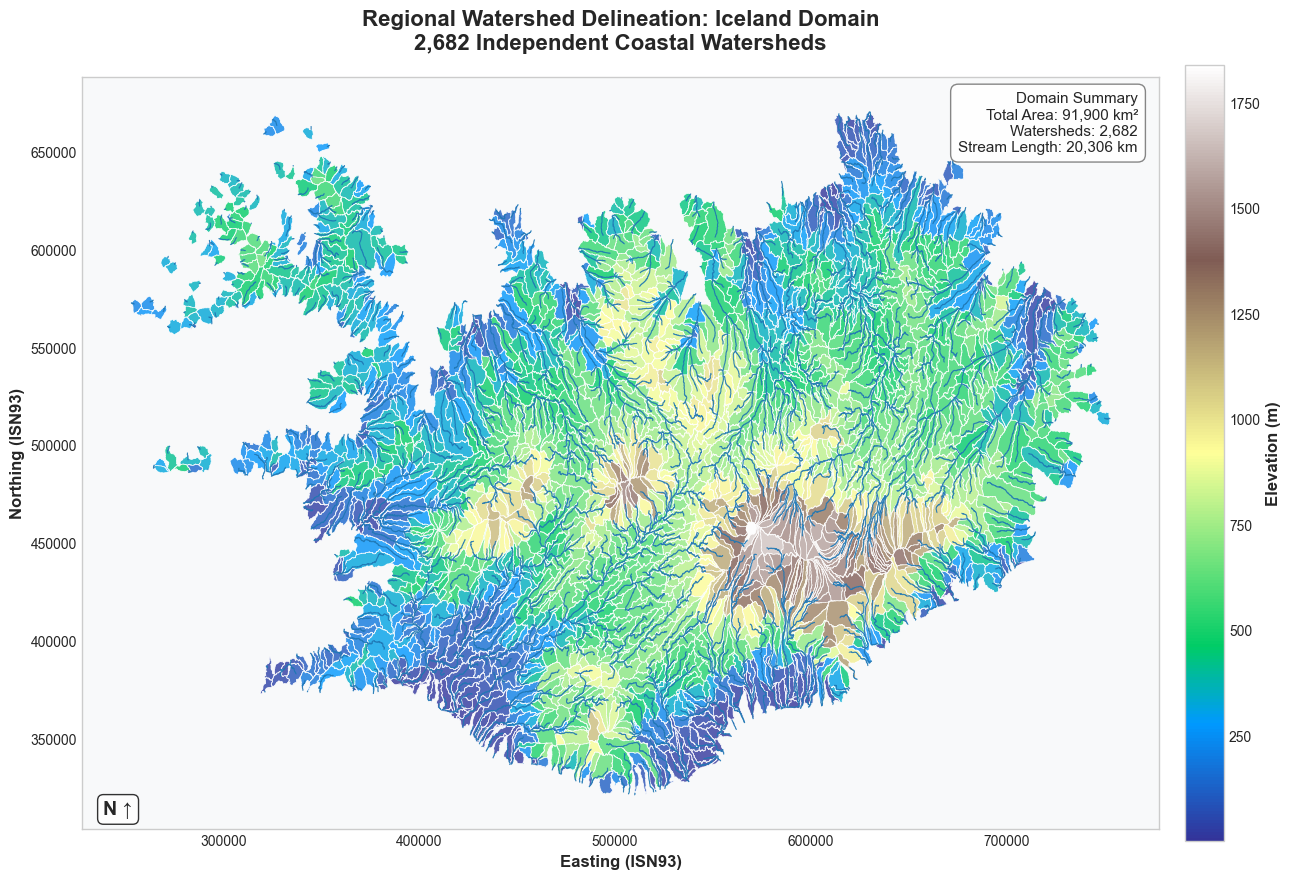

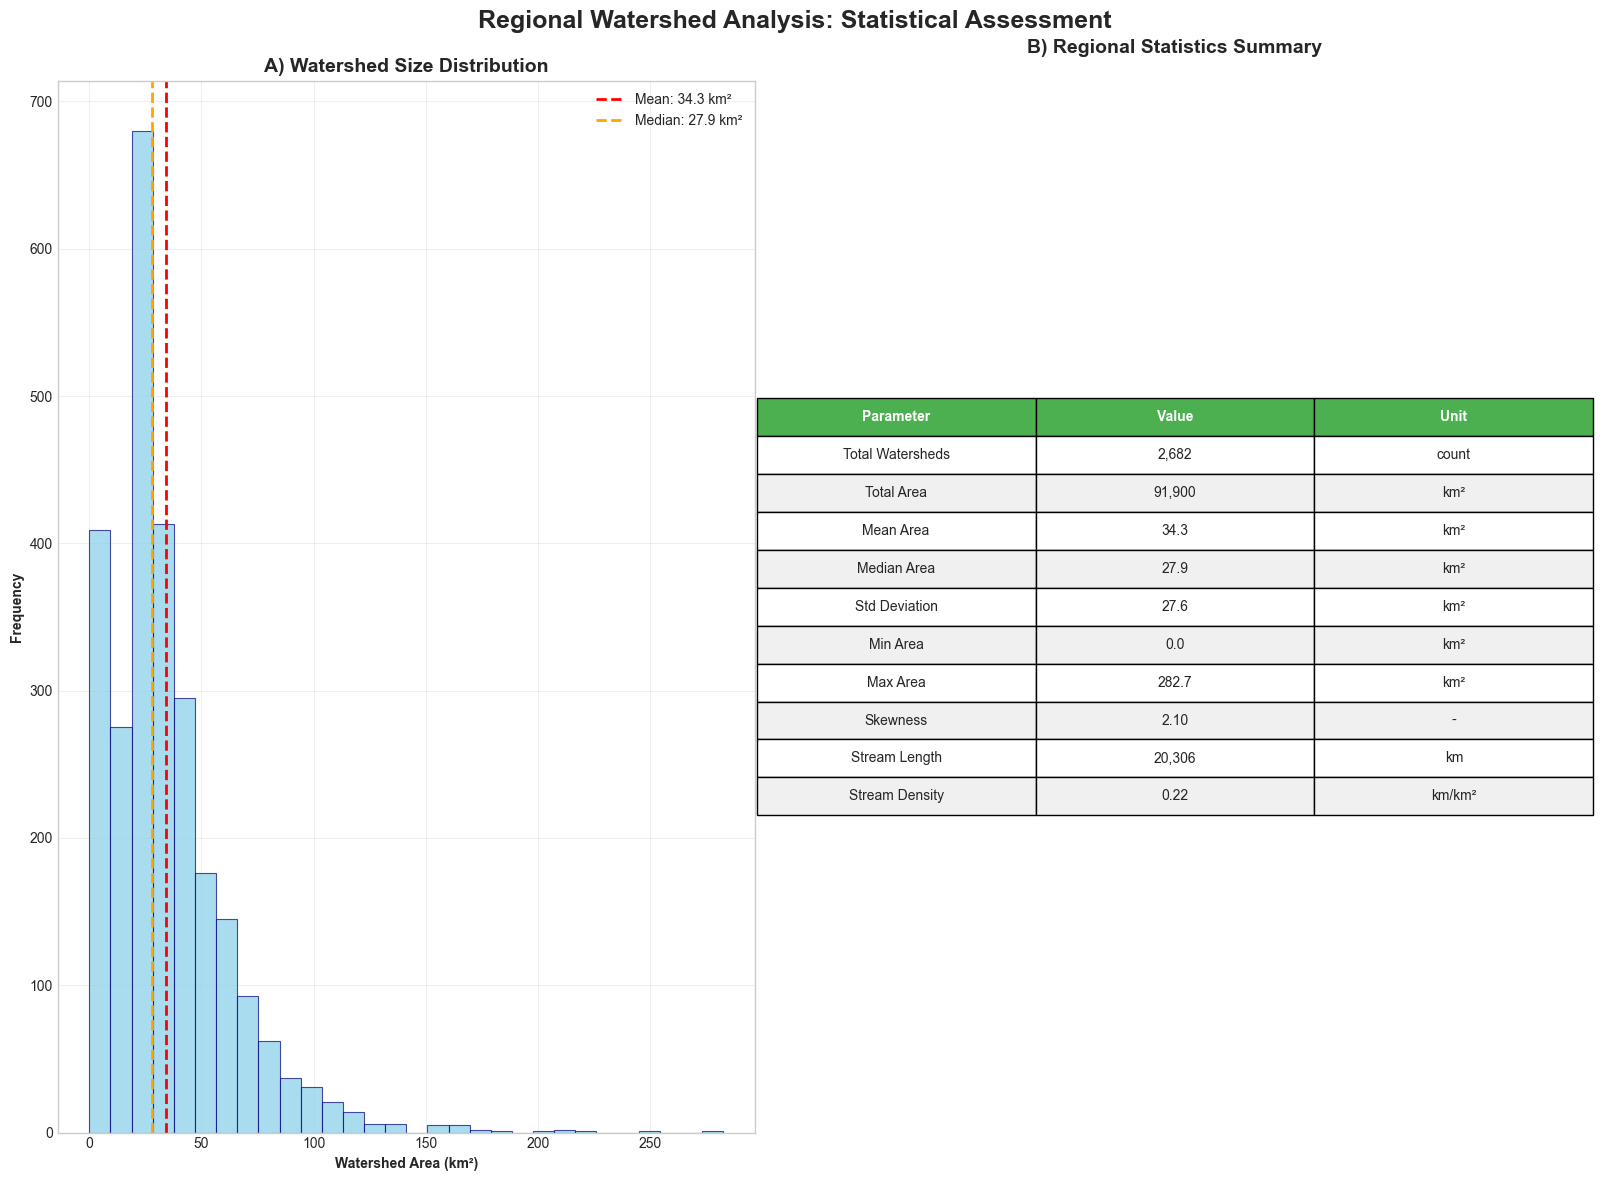

NameError: name 'fig' is not defined

In [4]:
# Set styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load and analyze delineated watersheds
basin_path = project_dir / 'shapefiles' / 'river_basins'
network_path = project_dir / 'shapefiles' / 'river_network'

basin_count = 0
basin_files = []
basins_gdf = None

basin_files = list(basin_path.glob('*.shp'))
basins_gdf = gpd.read_file(basin_files[0])
basins_gdf = basins_gdf.to_crs(epsg=32627)
basin_count = len(basins_gdf)

# Calculate regional statistics
total_area = basins_gdf.geometry.area.sum() / 1e6  # Convert to km²
avg_area = total_area / basin_count
max_area = basins_gdf.geometry.area.max() / 1e6
min_area = basins_gdf.geometry.area.min() / 1e6
watershed_areas = basins_gdf.geometry.area / 1e6


# Analyze regional stream network
network_count = 0
network_files = []
rivers_gdf = None

hru_path = project_dir / 'shapefiles' / 'catchment' 
hru_files = list(hru_path.glob('*.shp'))
hru_gdf = gpd.read_file(hru_files[0])
            
basins_gdf['elevation'] = hru_gdf['elev_mean']
network_files = list(network_path.glob('*.shp'))
rivers_gdf = gpd.read_file(network_files[0])
network_count = len(rivers_gdf)
total_length = rivers_gdf['Length'].sum() / 1000  # Convert to km
                
    
# Create standalone map figure
fig1, ax1 = plt.subplots(1, 1, figsize=(14, 10))

# Use appropriate CRS for Iceland and get bounds
# Try Iceland's national grid system first, fall back to geographic
try:
    basins_display = basins_gdf.to_crs(epsg=3057)  # ISN93 / Lambert 1993 (Iceland)
    crs_name = "ISN93 Lambert 1993"
    xlabel = "Easting (ISN93)"
    ylabel = "Northing (ISN93)"
except:
    try:
        basins_display = basins_gdf.to_crs(epsg=4326)  # WGS84 Geographic
        crs_name = "WGS84 Geographic"
        xlabel = "Longitude (°)"
        ylabel = "Latitude (°)"
    except:
        basins_display = basins_gdf  # Use original CRS
        crs_name = "UTM Zone 27N"
        xlabel = "Easting (UTM 27N)"
        ylabel = "Northing (UTM 27N)"

# Plot watersheds with professional styling
if 'elevation' in basins_display.columns:
    # Plot with elevation coloring
    im = basins_display.plot(ax=ax1, column='elevation', cmap='terrain', 
                           edgecolor='white', linewidth=0.5, alpha=0.8, legend=False)
    
    # Add colorbar for elevation
    sm = plt.cm.ScalarMappable(cmap='terrain', 
                             norm=plt.Normalize(vmin=basins_display['elevation'].min(), 
                                               vmax=basins_display['elevation'].max()))
    sm.set_array([])
    cbar = fig1.colorbar(sm, ax=ax1, orientation='vertical', shrink=0.8, pad=0.02)
    cbar.set_label('Elevation (m)', fontweight='bold', fontsize=12)
    cbar.ax.tick_params(labelsize=10)
    
elif 'GRU_ID' in basins_display.columns:
    basins_display.plot(ax=ax1, column='GRU_ID', cmap='tab20', 
                       edgecolor='white', linewidth=0.5, alpha=0.8, legend=False)
else:
    basins_display.plot(ax=ax1, cmap='Set3', 
                       edgecolor='white', linewidth=0.5, alpha=0.8, legend=False)

# Add stream network if available (reproject to match basins)
if rivers_gdf is not None:
    try:
        rivers_display = rivers_gdf.to_crs(basins_display.crs)
        rivers_display.plot(ax=ax1, color='#1f77b4', linewidth=0.8, alpha=0.9)
    except:
        pass  # Skip if reprojection fails

# Set proper extent to show full region
bounds = basins_display.total_bounds
x_range = bounds[2] - bounds[0]
y_range = bounds[3] - bounds[1]

# Add 5% padding around the data
padding = 0.05
ax1.set_xlim(bounds[0] - x_range * padding, bounds[2] + x_range * padding)
ax1.set_ylim(bounds[1] - y_range * padding, bounds[3] + y_range * padding)

# Professional styling
ax1.set_title('Regional Watershed Delineation: Iceland Domain\n' + 
             f'{basin_count:,} Independent Coastal Watersheds', 
             fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel(xlabel, fontsize=12, fontweight='bold')
ax1.set_ylabel(ylabel, fontsize=12, fontweight='bold')

# Set aspect ratio to equal for proper geographic representation
ax1.set_aspect('equal')

# Remove grid for cleaner look
ax1.grid(False)
ax1.set_facecolor('#f8f9fa')

# Add scale and north arrow (simplified)
ax1.text(0.02, 0.02, 'N ↑', transform=ax1.transAxes, 
        fontsize=14, fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

# Add summary statistics box
stats_text = (f'Domain Summary\n'
             f'Total Area: {total_area:,.0f} km²\n'
             f'Watersheds: {basin_count:,}\n'
             f'Stream Length: {total_length:,.0f} km')

ax1.text(0.98, 0.98, stats_text, transform=ax1.transAxes, 
        fontsize=11, ha='right', va='top',
        bbox=dict(boxstyle="round,pad=0.5", facecolor='white', 
                 edgecolor='gray', alpha=0.95))

plt.tight_layout()
plt.show()

# =============================================================================
# FIGURE 2: COMPREHENSIVE STATISTICAL ANALYSIS
# =============================================================================

# Create analysis dashboard
fig2, ((ax2, ax4)) = plt.subplots(1, 2, figsize=(16, 12))

# Subplot 1: Watershed Size Distribution (Enhanced)
n_bins = min(30, max(10, basin_count//10))
n, bins, patches = ax2.hist(watershed_areas, bins=n_bins, 
                           color='skyblue', alpha=0.7, edgecolor='navy', linewidth=0.8)

# Add distribution statistics
ax2.axvline(watershed_areas.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {watershed_areas.mean():.1f} km²')
ax2.axvline(watershed_areas.median(), color='orange', linestyle='--', linewidth=2,
           label=f'Median: {watershed_areas.median():.1f} km²')

ax2.set_xlabel('Watershed Area (km²)', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('A) Watershed Size Distribution', fontweight='bold', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Subplot 3: Statistical Summary Table
ax4.axis('off')

# Create statistics table
stats_data = [
    ['Parameter', 'Value', 'Unit'],
    ['Total Watersheds', f'{basin_count:,}', 'count'],
    ['Total Area', f'{total_area:,.0f}', 'km²'],
    ['Mean Area', f'{watershed_areas.mean():.1f}', 'km²'],
    ['Median Area', f'{watershed_areas.median():.1f}', 'km²'],
    ['Std Deviation', f'{watershed_areas.std():.1f}', 'km²'],
    ['Min Area', f'{watershed_areas.min():.1f}', 'km²'],
    ['Max Area', f'{watershed_areas.max():.1f}', 'km²'],
    ['Skewness', f'{watershed_areas.skew():.2f}', '-'],
    ['Stream Length', f'{total_length:,.0f}', 'km'],
    ['Stream Density', f'{total_length/total_area:.2f}', 'km/km²']
]

table = ax4.table(cellText=stats_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)

# Style the table
for i in range(len(stats_data)):
    for j in range(len(stats_data[0])):
        cell = table[(i, j)]
        if i == 0:  # Header row
            cell.set_facecolor('#4CAF50')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#f0f0f0' if i % 2 == 0 else 'white')

ax4.set_title('B) Regional Statistics Summary', fontweight='bold', fontsize=14, pad=20)

plt.suptitle('Regional Watershed Analysis: Statistical Assessment', 
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()
fig.savefig('/Users/darrieythorsson/compHydro/iceland.png')

## Step 3: Regional Multi-Watershed Data Pipeline
The same model-agnostic preprocessing framework now scales to handle multiple independent drainage systems across an entire region, representing the most computationally demanding and hydrologically diverse configuration in our tutorial series. Unlike previous tutorials that processed connected watersheds or sub-watersheds, we now handle dozens of independent drainage systems with diverse hydrological regimes, coastal boundaries.

In [ ]:
"""
# Check if forcing data acquisition is needed
forcing_dir = project_dir / 'forcing' / 'raw_data'
if not forcing_dir.exists() or len(list(forcing_dir.glob('*.nc'))) == 0:    
    # confluence.managers['data'].acquire_forcings()
    print("✅ Regional forcing data acquisition complete")
else:
    print(f"\n✅ Regional forcing data available")
    print(f"   Reusing meteorological data for regional domain")

#Executing Regional Model-Agnostic Preprocessing...
confluence.managers['data'].run_model_agnostic_preprocessing()
print("✅ Regional model-agnostic preprocessing complete")

#Executing Regional Model-Specific Preprocessing...
confluence.managers['model'].preprocess_models()
print("✅ Regional model-specific preprocessing complete")
"""


## Step 4: Regional Multi-Watershed Model Execution
The same SUMMA process-based physics now executes across multiple independent drainage systems spanning an entire region. This integration of regional-scale meteorological forcing with multiple unconnected watershed systems demonstrates how the same computational framework scales to handle comprehensive regional water resources assessment.

In [ ]:
""""
# Execute the regional model system
confluence.managers['model'].run_models()
print("✅ Regional multi-watershed simulation complete")
"""

## Step 5: Regional Multi-Watershed Analysis 


   ✓ SWE: 86.7 ± 175.0 mm
   ✓ Soil Moisture: 0.21 ± 0.03 m³/m³
   ✓ ET (scalarTotalET): 65.93 ± 809.24 mm/day
   ✓ Total outlets: 399
   ✓ Flow range: 0.0 - 306.4 m³/s
   ✓ Total discharge: 14597.1 ± 6075.3 m³/s


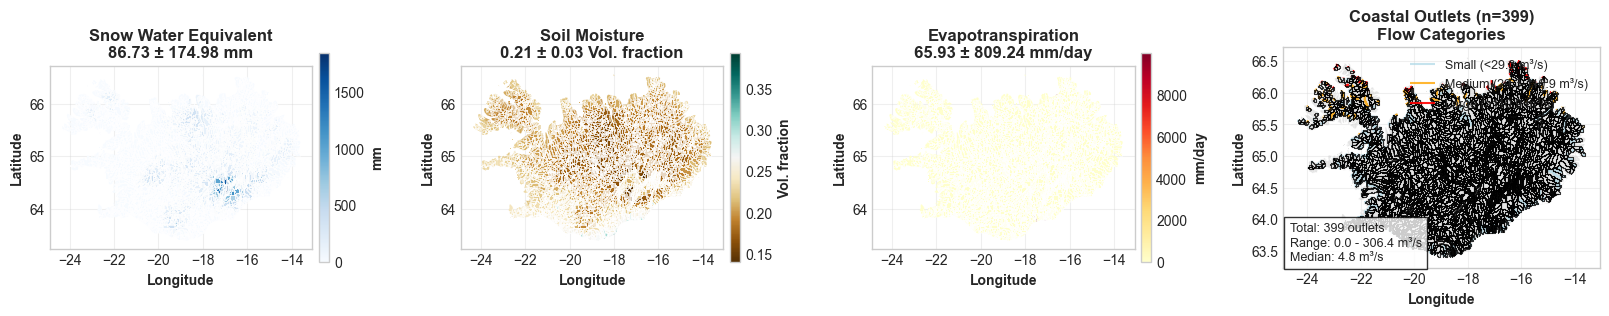

In [5]:
# Set styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Load watershed boundaries and network data
basin_path = project_dir / 'shapefiles' / 'river_basins'
catchment_path = project_dir / 'shapefiles' / 'catchment'
network_path = project_dir / 'shapefiles' / 'river_network'

# Load watershed boundaries
basins_gdf = None
basin_files = list(basin_path.glob('*.shp'))
basins_gdf = gpd.read_file(basin_files[0])

# Load river network for proper outlet identification
network_gdf = None
outlet_segments = []
network_files = list(network_path.glob('*.shp'))
network_gdf = gpd.read_file(network_files[0])

# Identify true outlets (DSLINKNO = -1)
if 'DSLINKNO' in network_gdf.columns:
    outlet_links = network_gdf[network_gdf['DSLINKNO'] == -1]
    outlet_segments = outlet_links['LINKNO'].values

# Load HRU/GRU boundaries
hru_gdf = None
hru_files = list(catchment_path.glob('*.shp'))
hru_gdf = gpd.read_file(hru_files[0])


# Load SUMMA regional outputs
simulation_dir = project_dir / 'simulations' / config_dict['EXPERIMENT_ID']
summa_dir = simulation_dir / 'SUMMA'
routing_dir = simulation_dir / 'mizuRoute'

summa_files = list(summa_dir.glob('*day.nc')) if summa_dir.exists() else []
regional_summa_data = None

regional_summa_data = xr.open_dataset(summa_files[0])

# Load mizuRoute regional outputs
routing_files = list(routing_dir.glob('*.nc')) if routing_dir.exists() else []
regional_routing_data = None
regional_routing_data = xr.open_dataset(routing_files[0])


spatial_data = {}
# Snow Water Equivalent
if 'scalarSWE' in regional_summa_data.data_vars:
    swe_data = regional_summa_data['scalarSWE'].mean(dim='time')
    spatial_data['SWE'] = {
        'data': swe_data,
        'name': 'Snow Water Equivalent',
        'units': 'mm',
        'cmap': 'Blues'
    }
    print(f"   ✓ SWE: {swe_data.mean().values:.1f} ± {swe_data.std().values:.1f} mm")

# Soil Moisture 
if 'mLayerVolFracLiq' in regional_summa_data.data_vars:
    soil_data = regional_summa_data['mLayerVolFracLiq']
    if 'midToto' in soil_data.dims:
        soil_data = soil_data.where(soil_data != -9999)
        soil_data = soil_data.mean(dim='midToto')
    soil_data = soil_data.mean(dim='time')
        
    spatial_data['Soil'] = {
        'data': soil_data,
        'name': 'Soil Moisture',
        'units': 'Vol. fraction',
        'cmap': 'BrBG'
    }
    print(f"   ✓ Soil Moisture: {soil_data.mean().values:.2f} ± {soil_data.std().values:.2f} m³/m³")

# Evapotranspiration
et_data = None
if 'scalarTotalET' in regional_summa_data.data_vars:
    et_data = regional_summa_data['scalarTotalET'].mean(dim='time')
    et_data = np.abs(et_data)  # Make positive
    et_name = 'scalarTotalET'
elif 'scalarLatHeatTotal' in regional_summa_data.data_vars:
    et_data = regional_summa_data['scalarLatHeatTotal'].mean(dim='time')
    et_data = np.abs(et_data)  # Make positive
    # Latent heat (W/m²) to ET (mm/day): LE / 28.4
    et_data = et_data / 28.4
    et_name = 'scalarLatHeatTotal'

if et_data is not None:    
    spatial_data['ET'] = {
        'data': et_data,
        'name': 'Evapotranspiration',
        'units': 'mm/day',
        'cmap': 'YlOrRd'
    }
    print(f"   ✓ ET ({et_name}): {et_data.mean().values:.2f} ± {et_data.std().values:.2f} mm/day")


# =============================================================================
# PROCESS OUTLET DATA
# =============================================================================

total_runoff_ts = None
outlet_flows_mean = None
outlet_gdf = None

streamflow_data = regional_routing_data['IRFroutedRunoff']
n_segments = streamflow_data.sizes.get('seg', 0)

# Map outlet LINKNO to segment indices
valid_outlets = []
for link_no in outlet_segments:
    if link_no < n_segments:
        valid_outlets.append(link_no)

if len(valid_outlets) > 0:
    # Calculate total Iceland runoff
    total_iceland_runoff = streamflow_data.isel(seg=valid_outlets).sum(dim='seg')
    total_runoff_ts = total_iceland_runoff.to_pandas()
    
    # Get mean flows for each outlet
    outlet_flows_mean = streamflow_data.isel(seg=valid_outlets).mean(dim='time')
    
    # Create outlet geodataframe for mapping
    if network_gdf is not None:
        outlet_network = network_gdf[network_gdf['DSLINKNO'] == -1].copy()
        if len(outlet_network) == len(outlet_flows_mean):
            outlet_network['mean_flow'] = outlet_flows_mean.values
            outlet_gdf = outlet_network
    
    print(f"   ✓ Total outlets: {len(valid_outlets)}")
    print(f"   ✓ Flow range: {outlet_flows_mean.min().values:.1f} - {outlet_flows_mean.max().values:.1f} m³/s")
    print(f"   ✓ Total discharge: {total_runoff_ts.mean():.1f} ± {total_runoff_ts.std():.1f} m³/s")

# =============================================================================
#  VISUALIZATION
# =============================================================================

# Create main figure with subplots
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)


# Prepare HRU data for plotting
hru_plot = hru_gdf.copy()
if hru_plot.crs != 'EPSG:4326':
    try:
        hru_plot = hru_plot.to_crs('EPSG:4326')
    except:
        pass

for i, (key, var_dict) in enumerate(spatial_data.items()):
    ax = fig.add_subplot(gs[0, i])
    
    var_data = var_dict['data']
    if len(var_data) == len(hru_plot):
        hru_plot[f'{key}_val'] = var_data.values
        
        # Create choropleth map
        im = hru_plot.plot(ax=ax, column=f'{key}_val', 
                          cmap=var_dict['cmap'], 
                          edgecolor='none', 
                          legend=False)
        
        # Add colorbar
        vmin, vmax = var_data.min().values, var_data.max().values
        sm = plt.cm.ScalarMappable(cmap=var_dict['cmap'], 
                                 norm=plt.Normalize(vmin=vmin, vmax=vmax))
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax, shrink=0.7, pad=0.02)
        cbar.set_label(f"{var_dict['units']}", fontweight='bold', fontsize=10)
        
        # Add watershed boundaries
        if basins_gdf is not None:
            basins_plot = basins_gdf.copy()
            try:
                if basins_plot.crs != hru_plot.crs:
                    basins_plot = basins_plot.to_crs(hru_plot.crs)
            except:
                pass
            basins_plot.boundary.plot(ax=ax, color='white', linewidth=0.5, alpha=0.7)
        
        # Title and stats
        mean_val = var_data.mean().values
        std_val = var_data.std().values
        ax.set_title(f"{var_dict['name']}\n{mean_val:.2f} ± {std_val:.2f} {var_dict['units']}", 
                    fontweight='bold', fontsize=12)
        
    ax.set_xlabel('Longitude', fontweight='bold', fontsize=10)
    ax.set_ylabel('Latitude', fontweight='bold', fontsize=10)
    ax.grid(True, alpha=0.3)


# =============================================================================
# ROW 1: OUTLET LOCATIONS MAP (4th plot)
# =============================================================================

ax_outlets = fig.add_subplot(gs[0, 3])

if outlet_gdf is not None and hru_gdf is not None:
    # Plot HRUs as background
    hru_plot.plot(ax=ax_outlets, color='lightgray', edgecolor='white', linewidth=0.1, alpha=0.6)
    
    # Plot outlets colored by flow magnitude
    outlet_plot = outlet_gdf.copy()
    try:
        if outlet_plot.crs != hru_plot.crs:
            outlet_plot = outlet_plot.to_crs(hru_plot.crs)
    except:
        pass
    
    # Categorize outlets by flow size
    flows = outlet_plot['mean_flow']
    small_outlets = outlet_plot[flows <= flows.quantile(0.7)]
    medium_outlets = outlet_plot[(flows > flows.quantile(0.7)) & (flows <= flows.quantile(0.9))]
    large_outlets = outlet_plot[flows > flows.quantile(0.9)]
    
    # Plot different sized outlets
    if len(small_outlets) > 0:
        small_outlets.plot(ax=ax_outlets, color='lightblue', markersize=8, alpha=0.7, label=f'Small (<{flows.quantile(0.7):.1f} m³/s)')
    if len(medium_outlets) > 0:
        medium_outlets.plot(ax=ax_outlets, color='orange', markersize=15, alpha=0.8, label=f'Medium ({flows.quantile(0.7):.1f}-{flows.quantile(0.9):.1f} m³/s)')
    if len(large_outlets) > 0:
        large_outlets.plot(ax=ax_outlets, color='red', markersize=25, alpha=0.9, label=f'Large (>{flows.quantile(0.9):.1f} m³/s)')
    
    # Add watershed boundaries
    if basins_gdf is not None:
        basins_plot.boundary.plot(ax=ax_outlets, color='black', linewidth=0.8, alpha=0.8)
    
    ax_outlets.legend(fontsize=9, loc='upper right')
    ax_outlets.set_title(f'Coastal Outlets (n={len(outlet_plot)})\nFlow Categories', fontweight='bold', fontsize=12)
    
    # Add summary stats
    stats_text = (f'Total: {len(outlet_plot)} outlets\n'
                 f'Range: {flows.min():.1f} - {flows.max():.1f} m³/s\n'
                 f'Median: {flows.median():.1f} m³/s')
    ax_outlets.text(0.02, 0.02, stats_text, transform=ax_outlets.transAxes,
                   bbox=dict(facecolor='white', alpha=0.8), fontsize=9, va='bottom')

ax_outlets.set_xlabel('Longitude', fontweight='bold', fontsize=10)
ax_outlets.set_ylabel('Latitude', fontweight='bold', fontsize=10)
ax_outlets.grid(True, alpha=0.3)


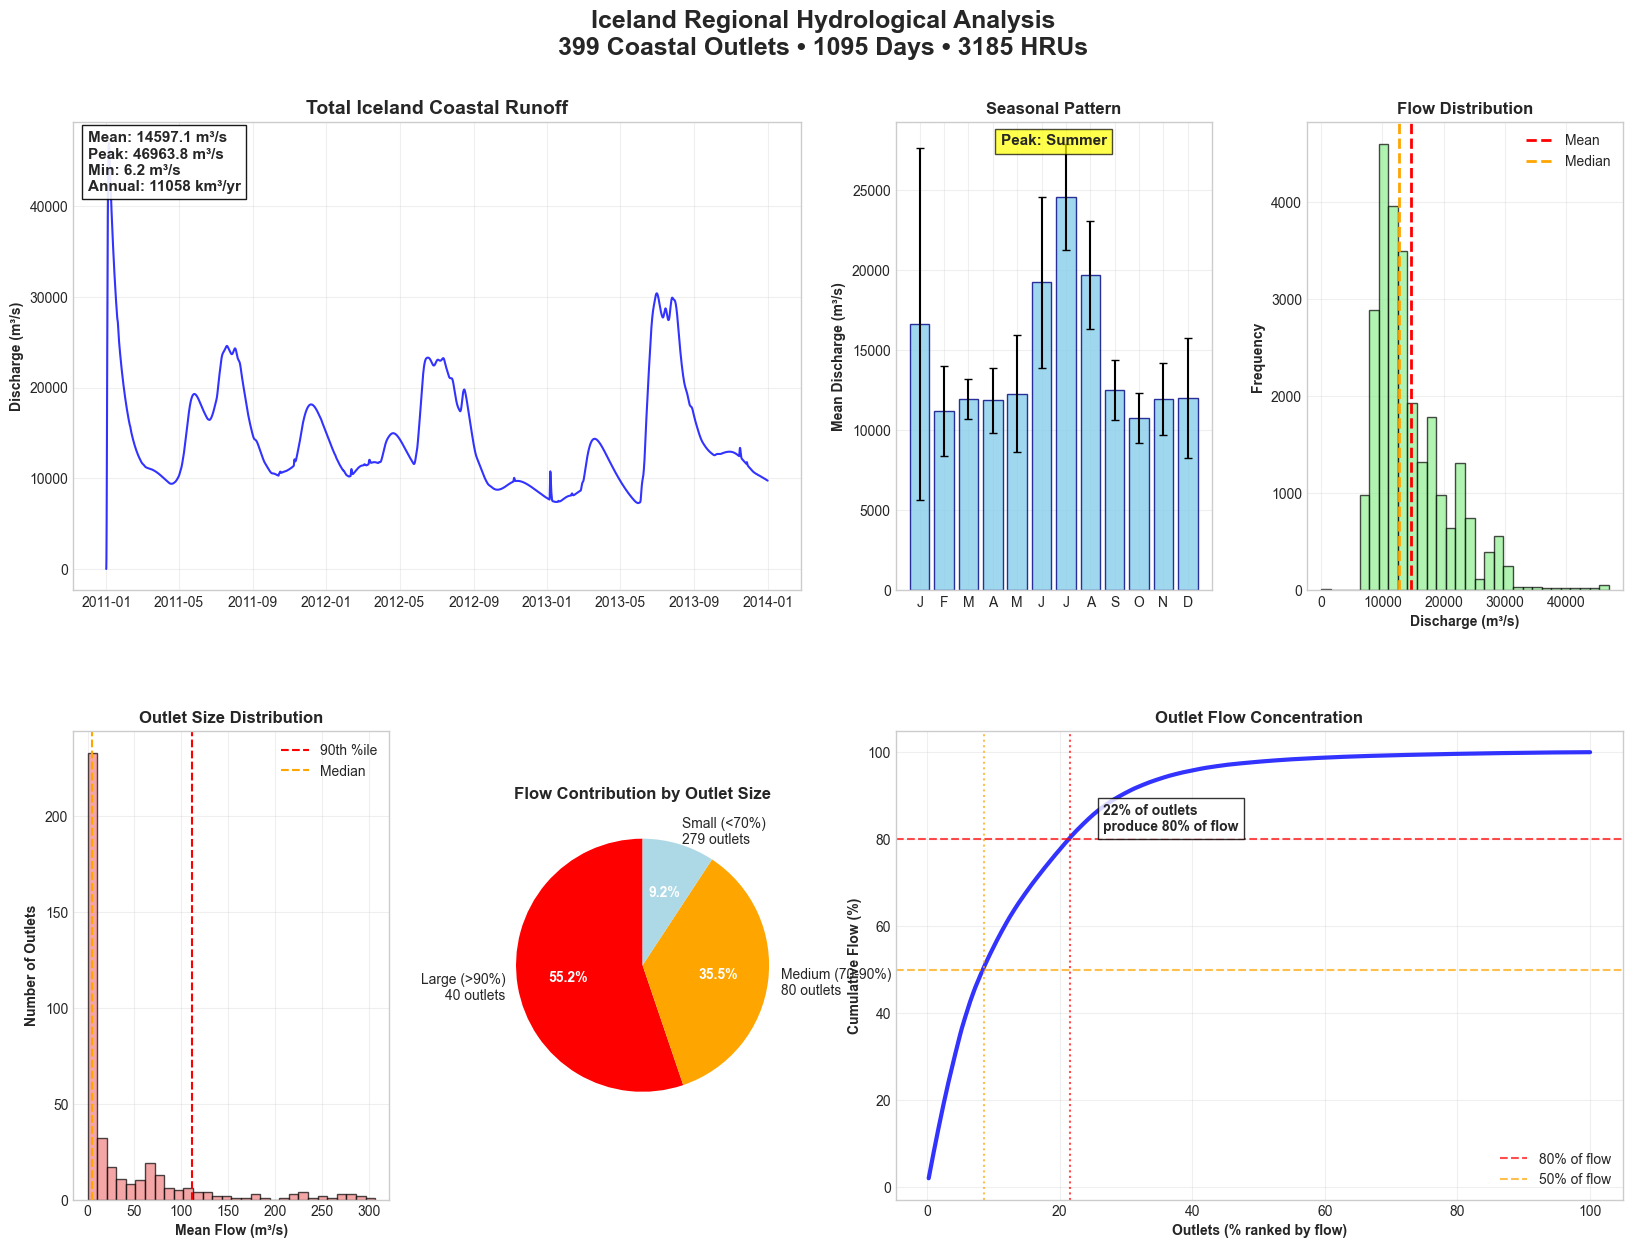

In [6]:
# Create main figure with subplots
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(2, 4, hspace=0.3, wspace=0.3)

if total_runoff_ts is not None:
    
    # Time series (spans 2 columns)
    ax_ts = fig.add_subplot(gs[0, :2])
    ax_ts.plot(total_runoff_ts.index, total_runoff_ts.values, 'b-', linewidth=1.5, alpha=0.8)
    ax_ts.set_title('Total Iceland Coastal Runoff', fontweight='bold', fontsize=14)
    ax_ts.set_ylabel('Discharge (m³/s)', fontweight='bold')
    ax_ts.grid(True, alpha=0.3)
    
    # Add statistics on plot
    stats_text = (f'Mean: {total_runoff_ts.mean():.1f} m³/s\n'
                 f'Peak: {total_runoff_ts.max():.1f} m³/s\n'
                 f'Min: {total_runoff_ts.min():.1f} m³/s\n'
                 f'Annual: {total_runoff_ts.sum() * 86400 / 1e9 / len(total_runoff_ts.resample("YE").sum()):.0f} km³/yr')
    ax_ts.text(0.02, 0.98, stats_text, transform=ax_ts.transAxes,
              bbox=dict(facecolor='white', alpha=0.9), fontsize=11, va='top', fontweight='bold')
    
    # Seasonal pattern
    ax_seasonal = fig.add_subplot(gs[0, 2])
    monthly_mean = total_runoff_ts.groupby(total_runoff_ts.index.month).mean()
    monthly_std = total_runoff_ts.groupby(total_runoff_ts.index.month).std()
    months = range(1, 13)
    month_names = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
    
    monthly_vals = [monthly_mean.get(m, 0) for m in months]
    monthly_errs = [monthly_std.get(m, 0) for m in months]
    
    bars = ax_seasonal.bar(months, monthly_vals, yerr=monthly_errs, 
                          capsize=3, color='skyblue', edgecolor='navy', alpha=0.8)
    ax_seasonal.set_xticks(months)
    ax_seasonal.set_xticklabels(month_names)
    ax_seasonal.set_ylabel('Mean Discharge (m³/s)', fontweight='bold')
    ax_seasonal.set_title('Seasonal Pattern', fontweight='bold', fontsize=12)
    ax_seasonal.grid(True, alpha=0.3)
    
    # Highlight peak season
    peak_month = np.argmax(monthly_vals) + 1
    peak_season = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 
                  'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter'][peak_month-1]
    ax_seasonal.text(0.5, 0.95, f'Peak: {peak_season}', transform=ax_seasonal.transAxes,
                    ha='center', fontweight='bold', fontsize=11,
                    bbox=dict(facecolor='yellow', alpha=0.7))
    
    # Flow distribution
    ax_dist = fig.add_subplot(gs[0, 3])
    ax_dist.hist(total_runoff_ts.values, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    ax_dist.axvline(total_runoff_ts.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    ax_dist.axvline(total_runoff_ts.median(), color='orange', linestyle='--', linewidth=2, label='Median')
    ax_dist.set_xlabel('Discharge (m³/s)', fontweight='bold')
    ax_dist.set_ylabel('Frequency', fontweight='bold')
    ax_dist.set_title('Flow Distribution', fontweight='bold', fontsize=12)
    ax_dist.legend(fontsize=10)
    ax_dist.grid(True, alpha=0.3)

# =============================================================================
# ROW 3: OUTLET ANALYSIS
# =============================================================================

if outlet_flows_mean is not None and len(outlet_flows_mean) > 0:
    
    # Outlet size distribution
    ax_outlet_dist = fig.add_subplot(gs[1, 0])
    flows = outlet_flows_mean.values
    ax_outlet_dist.hist(flows, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    ax_outlet_dist.set_xlabel('Mean Flow (m³/s)', fontweight='bold')
    ax_outlet_dist.set_ylabel('Number of Outlets', fontweight='bold')
    ax_outlet_dist.set_title('Outlet Size Distribution', fontweight='bold', fontsize=12)
    ax_outlet_dist.grid(True, alpha=0.3)
    
    # Add percentile lines
    p90 = np.percentile(flows, 90)
    p50 = np.percentile(flows, 50)
    ax_outlet_dist.axvline(p90, color='red', linestyle='--', label='90th %ile')
    ax_outlet_dist.axvline(p50, color='orange', linestyle='--', label='Median')
    ax_outlet_dist.legend(fontsize=10)
    
    # Flow contribution pie chart
    ax_pie = fig.add_subplot(gs[1, 1])
    
    # Categorize flows
    large_flow = flows[flows > np.percentile(flows, 90)].sum()
    medium_flow = flows[(flows > np.percentile(flows, 70)) & (flows <= np.percentile(flows, 90))].sum()
    small_flow = flows[flows <= np.percentile(flows, 70)].sum()
    
    sizes = [large_flow, medium_flow, small_flow]
    labels = [f'Large (>90%)\n{len(flows[flows > np.percentile(flows, 90)])} outlets',
              f'Medium (70-90%)\n{len(flows[(flows > np.percentile(flows, 70)) & (flows <= np.percentile(flows, 90))])} outlets',
              f'Small (<70%)\n{len(flows[flows <= np.percentile(flows, 70)])} outlets']
    colors = ['red', 'orange', 'lightblue']
    
    wedges, texts, autotexts = ax_pie.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
                                         startangle=90, textprops={'fontsize': 10})
    ax_pie.set_title('Flow Contribution by Outlet Size', fontweight='bold', fontsize=12)
    
    # Make percentage text bold
    for autotext in autotexts:
        autotext.set_fontweight('bold')
        autotext.set_color('white')
    
    # Cumulative flow analysis
    ax_cumul = fig.add_subplot(gs[1, 2:])
    sorted_flows = np.sort(flows)[::-1]  # Descending
    cumulative_pct = np.cumsum(sorted_flows) / sorted_flows.sum() * 100
    outlet_pct = np.arange(1, len(sorted_flows) + 1) / len(sorted_flows) * 100
    
    ax_cumul.plot(outlet_pct, cumulative_pct, 'b-', linewidth=3, alpha=0.8)
    ax_cumul.axhline(80, color='red', linestyle='--', alpha=0.7, label='80% of flow')
    ax_cumul.axhline(50, color='orange', linestyle='--', alpha=0.7, label='50% of flow')
    
    # Find what % of outlets produce 80% and 50% of flow
    idx_80 = np.where(cumulative_pct >= 80)[0]
    idx_50 = np.where(cumulative_pct >= 50)[0]
    
    if len(idx_80) > 0:
        outlets_80 = outlet_pct[idx_80[0]]
        ax_cumul.axvline(outlets_80, color='red', linestyle=':', alpha=0.7)
        ax_cumul.text(outlets_80 + 5, 82, f'{outlets_80:.0f}% of outlets\nproduce 80% of flow', 
                     fontweight='bold', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    
    if len(idx_50) > 0:
        outlets_50 = outlet_pct[idx_50[0]]
        ax_cumul.axvline(outlets_50, color='orange', linestyle=':', alpha=0.7)
    
    ax_cumul.set_xlabel('Outlets (% ranked by flow)', fontweight='bold')
    ax_cumul.set_ylabel('Cumulative Flow (%)', fontweight='bold')
    ax_cumul.set_title('Outlet Flow Concentration', fontweight='bold', fontsize=12)
    ax_cumul.legend(fontsize=10)
    ax_cumul.grid(True, alpha=0.3)

# Main title
fig.suptitle(f'Iceland Regional Hydrological Analysis\n'
           f'{len(outlet_segments) if len(outlet_segments) > 0 else "Unknown"} Coastal Outlets • '
           f'{regional_summa_data.dims.get("time", "Unknown") if regional_summa_data else "Unknown"} Days • '
           f'{len(hru_gdf) if hru_gdf is not None else "Unknown"} HRUs',
           fontsize=18, fontweight='bold', y=0.96)

plt.show()

# Clean up
if regional_summa_data is not None:
    regional_summa_data.close()
if regional_routing_data is not None:
    regional_routing_data.close()

## Streamflow evaluation against the LAMAH-ICE dataset

In [ ]:
# plotting style
plt.style.use('default')
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': '#333333',
    'axes.linewidth': 0.8,
    'xtick.color': '#333333',
    'ytick.color': '#333333',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'legend.fontsize': 9,
    'grid.alpha': 0.3
})

def load_and_analyze_network_data():
    """Load and analyze network data to understand segment indexing"""
        
    # Load river network shapefile
    network_path = project_dir / 'shapefiles' / 'river_network'
    network_files = list(network_path.glob('*.shp'))
    
    if not network_files:
        print("❌ No river network shapefile found")
        return None, None, None
    
    network_gdf = gpd.read_file(network_files[0])
    if network_gdf.crs and network_gdf.crs.to_string() != 'EPSG:4326':
        network_gdf = network_gdf.to_crs('EPSG:4326')
        
    # Check for segment ID columns
    id_columns = [col for col in network_gdf.columns 
                 if any(word in col.upper() for word in ['ID', 'LINK', 'SEG', 'REACH'])]
    print(f"   ID columns: {id_columns}")
    
    # Load simulation data
    routing_dir = project_dir / 'simulations' / config_dict['EXPERIMENT_ID'] / 'mizuRoute'
    routing_files = list(routing_dir.glob('*.nc'))
    
    if not routing_files:
        print("❌ No simulation files found")
        return None, None, None
    
    sim_ds = xr.open_dataset(routing_files[0])
    streamflow_var = None
    
    # Find streamflow variable
    possible_vars = ['IRFroutedRunoff', 'streamflow', 'discharge', 'runoff', 'q']
    for var in possible_vars:
        if var in sim_ds.variables:
            streamflow_var = var
            break
    
    if streamflow_var is None:
        print("❌ No streamflow variable found")
        return None, None, None
    
    streamflow_sim = sim_ds[streamflow_var]
    n_segments = streamflow_sim.sizes.get('seg', 0)
        
    return network_gdf, streamflow_sim, id_columns

def find_closest_river_segment(gauge_point, network_gdf, max_distance=0.01):
    """Find the river segment closest to a gauge location"""
    
    # Calculate distances from gauge to all river segments
    distances = network_gdf.geometry.distance(gauge_point)
    closest_idx = distances.idxmin()
    closest_distance = distances.min()
    
    # Convert distance from degrees to km (approximate)
    distance_km = closest_distance * 111  # rough conversion
    
    if distance_km > max_distance * 111:  # max_distance in degrees
        return None, None, distance_km
    
    closest_segment = network_gdf.loc[closest_idx]
    return closest_segment, closest_idx, distance_km

def extract_segment_flow(streamflow_sim, segment_idx, id_columns, network_gdf):
    """Extract flow data for a specific segment with proper indexing"""
    
    try:
        # Method 1: Direct index (if network and sim have same order)
        max_seg = streamflow_sim.sizes.get('seg', 0)
        
        if segment_idx < max_seg:
            sim_data = streamflow_sim.isel(seg=segment_idx)
            sim_ts = sim_data.to_pandas()
            sim_ts.index = pd.to_datetime(sim_ts.index).normalize()
            
            # Check data quality
            valid_data = sim_ts.dropna()
            if len(valid_data) == 0:
                return None, "No valid data"
            
            # Check for unrealistic values
            if valid_data.max() < 0.001:  # Very small values
                return None, f"Suspiciously small values (max: {valid_data.max():.6f})"
            
            return sim_ts, "Success"
        else:
            return None, f"Index {segment_idx} >= {max_seg}"
            
    except Exception as e:
        return None, f"Error: {str(e)}"

def process_gauge_with_improved_matching(gauge, network_gdf, streamflow_sim, obs_data_dir, id_columns):
    """Process a single gauge with improved segment matching"""
    
    gauge_id = gauge['id'] 
    gauge_name = gauge['name']
    gauge_point = gauge.geometry
    
    print(f"\n📍 Processing {gauge_name} (ID: {gauge_id})")
    
    # Find closest river segment
    closest_segment, segment_idx, distance_km = find_closest_river_segment(gauge_point, network_gdf)
    
    if closest_segment is None:
        print(f"   ❌ No nearby river segment (closest: {distance_km:.2f} km)")
        return None
    
    # Load observed data
    obs_file = obs_data_dir / f"ID_{gauge_id}.csv"
    # Process observed data 
    for sep in [';', ',', '\t']:
        try:
            obs_df = pd.read_csv(obs_file, sep=sep)
            if obs_df.shape[1] > 1:
                break
        except:
            continue
    
    if 'YYYY' in obs_df.columns and 'MM' in obs_df.columns and 'DD' in obs_df.columns:
        obs_df['date'] = pd.to_datetime({
            'year': obs_df['YYYY'],
            'month': obs_df['MM'], 
            'day': obs_df['DD']
        })
    else:
        print(f"   ❌ Cannot parse dates in observed data")
        return None
    
    # Find discharge column
    discharge_col = None
    for col in obs_df.columns:
        if any(word in col.lower() for word in ['qobs', 'discharge', 'flow', 'q_']):
            discharge_col = col
            break
    
    if discharge_col is None:
        print(f"   ❌ No discharge column found")
        return None
    
    obs_df.set_index('date', inplace=True)
    obs_discharge = pd.to_numeric(obs_df[discharge_col], errors='coerce').dropna()
    obs_discharge = obs_discharge[(obs_discharge > 0) & (obs_discharge < 1e6)]
    
    if len(obs_discharge) < 100:
        print(f"   ❌ Insufficient observed data ({len(obs_discharge)} points)")
        return None
                
    # Extract simulated data
    sim_discharge, status_msg = extract_segment_flow(streamflow_sim, segment_idx, id_columns, network_gdf)
        
    # Find common period
    common_start = max(obs_discharge.index.min(), sim_discharge.index.min())
    common_end = min(obs_discharge.index.max(), sim_discharge.index.max())
    
    if common_start >= common_end:
        print(f"   ❌ No overlapping period")
        return None
    
    # Align data
    obs_common = obs_discharge.loc[common_start:common_end]
    sim_common = sim_discharge.loc[common_start:common_end]
    aligned_data = pd.DataFrame({'obs': obs_common, 'sim': sim_common}).dropna()
    
    if len(aligned_data) < 100:
        print(f"   ❌ Insufficient aligned data ({len(aligned_data)} points)")
        return None
    
    # Calculate performance metrics
    obs_vals = aligned_data['obs'].values
    sim_vals = aligned_data['sim'].values
    
    if np.std(obs_vals) == 0 or len(obs_vals) < 2:
        print(f"   ❌ Insufficient variance in observed data")
        return None
    
    # Calculate metrics
    r = np.corrcoef(obs_vals, sim_vals)[0, 1]
    obs_mean = np.mean(obs_vals)
    sim_mean = np.mean(sim_vals)
    
    alpha = np.std(sim_vals) / np.std(obs_vals)
    beta = sim_mean / obs_mean if obs_mean != 0 else 0
    kge = 1 - np.sqrt((r - 1)**2 + (alpha - 1)**2 + (beta - 1)**2)
    nse = 1 - np.sum((obs_vals - sim_vals)**2) / np.sum((obs_vals - obs_mean)**2)
    
    rmse = np.sqrt(mean_squared_error(obs_vals, sim_vals))
    bias = sim_mean - obs_mean
    pbias = 100 * bias / obs_mean if obs_mean != 0 else np.inf
    
    print(f"   ✅ KGE: {kge:.3f}, NSE: {nse:.3f}, r: {r:.3f}, PBIAS: {pbias:.1f}%")
    
    return {
        'gauge_id': gauge_id,
        'gauge_name': gauge_name,
        'segment_idx': segment_idx,
        'distance_km': distance_km,
        'aligned_data': aligned_data,
        'period_start': common_start,
        'period_end': common_end,
        'kge': kge, 'nse': nse, 'r': r, 'alpha': alpha, 'beta': beta,
        'rmse': rmse, 'bias': bias, 'pbias': pbias,
        'obs_mean': obs_mean, 'sim_mean': sim_mean,
        'segment_info': {col: closest_segment[col] for col in id_columns if col in closest_segment.index} if id_columns else {}
    }

def create_improved_hydrograph_comparison():
    """Create hydrograph comparison with proper segment extraction"""
        
    # Load network and simulation data
    network_gdf, streamflow_sim, id_columns = load_and_analyze_network_data()
    
    if any(x is None for x in [network_gdf, streamflow_sim]):
        print("❌ Failed to load network or simulation data")
        return None
    
    # Load gauge data
    gauges_path = "/Users/darrieythorsson/compHydro/data/lamah_ice/D_gauges/3_shapefiles/gauges.shp"
    gauges_gdf = gpd.read_file(gauges_path)
    if gauges_gdf.crs and gauges_gdf.crs.to_string() != 'EPSG:4326':
        gauges_gdf = gauges_gdf.to_crs('EPSG:4326')
    
    obs_data_dir = Path("/Users/darrieythorsson/compHydro/data/lamah_ice/D_gauges/2_timeseries/daily_filtered")
    
    print(f"\n🔍 Processing {len(gauges_gdf)} gauges...")
    
    # Process all gauges
    validation_results = []
    
    for idx, gauge in gauges_gdf.iterrows():
        result = process_gauge_with_improved_matching(
            gauge, network_gdf, streamflow_sim, obs_data_dir, id_columns
        )
        if result:
            validation_results.append(result)
    
    if len(validation_results) == 0:
        print("❌ No successful validations")
        return None
    
    print(f"\n📊 Successfully processed {len(validation_results)} validations")
    
    # Create summary table
    results_df = pd.DataFrame([{k: v for k, v in result.items() if k != 'aligned_data'} 
                              for result in validation_results])
    
    print(f"\n📈 Performance Summary:")
    print(f"   Mean KGE: {results_df['kge'].mean():.3f} ± {results_df['kge'].std():.3f}")
    print(f"   Mean NSE: {results_df['nse'].mean():.3f} ± {results_df['nse'].std():.3f}")
    print(f"   Mean |PBIAS|: {np.abs(results_df['pbias']).mean():.1f}%")
    
    # Select 6 best performing gauges for visualization
    best_gauges = results_df.nlargest(6, 'kge')
    
    print(f"\n🏆 Top 6 Performing Gauges (by KGE):")
    for _, gauge in best_gauges.iterrows():
        print(f"   {gauge['gauge_name']}: KGE={gauge['kge']:.3f}, NSE={gauge['nse']:.3f}")
    

    # Create visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, (_, gauge_info) in enumerate(best_gauges.iterrows()):
        ax = axes[i]
        
        # Find corresponding detailed result
        detailed_result = None
        for result in validation_results:
            if result['gauge_id'] == gauge_info['gauge_id']:
                detailed_result = result
                break
        
        if detailed_result is None:
            continue
        
        aligned_data = detailed_result['aligned_data']
        
        # Sample data if too dense
        if len(aligned_data) > 1000:
            step = len(aligned_data) // 1000
            plot_data = aligned_data.iloc[::step]
        else:
            plot_data = aligned_data
        
        # Plot hydrographs
        ax.plot(plot_data.index, plot_data['obs'], 'b-', linewidth=1.5, 
               label='Observed', alpha=0.8)
        ax.plot(plot_data.index, plot_data['sim'], 'r-', linewidth=1.2, 
               label='Simulated', alpha=0.9)
        
        # Formatting
        ax.set_ylabel('Discharge (m³/s)', fontweight='bold')
        ax.set_title(f"{detailed_result['gauge_name']}\n"
                    f"(ID: {detailed_result['gauge_id']}, "
                    f"Segment: {detailed_result['segment_idx']}, "
                    f"Dist: {detailed_result['distance_km']:.2f} km)", 
                    fontweight='bold', fontsize=11)
        ax.grid(True, alpha=0.3)
        ax.legend(loc='upper right')
        
        # Performance metrics
        metrics_text = (f"KGE = {detailed_result['kge']:.3f}\n"
                       f"NSE = {detailed_result['nse']:.3f}\n"
                       f"r = {detailed_result['r']:.3f}\n"
                       f"PBIAS = {detailed_result['pbias']:.1f}%")
        
        ax.text(0.02, 0.98, metrics_text, transform=ax.transAxes,
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9),
                fontsize=9, va='top', fontfamily='monospace')
        
        # Format dates
        ax.tick_params(axis='x', rotation=45, labelsize=9)
        ax.tick_params(axis='y', labelsize=9)
    
    # Remove unused subplots
    for i in range(len(best_gauges), len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('Hydrograph Comparison: Best Performing Gauges\n'
                 'Iceland Domain', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    return validation_results

# Execute the analysis
if __name__ == "__main__":
    validation_results = create_improved_hydrograph_comparison()
    

In [ ]:
# === Setup: Categorize KGE and define color palette ===
results_df = create_improved_performance_summary()

# Categorize performance based on KGE
def categorize_performance(kge):
    if pd.isna(kge):
        return 'Invalid'
    elif kge >= 0.75:
        return 'Excellent (≥0.75)'
    elif kge >= 0.5:
        return 'Good (0.5–0.75)'
    elif kge >= 0.25:
        return 'Fair (0.25–0.5)'
    else:
        return 'Poor (<0.25)'

if 'results_df' in globals():
    results_df['performance_cat'] = results_df['kge'].apply(categorize_performance)
    
# Define consistent color mapping
perf_colors = {
    'Excellent (≥0.75)': '#2E8B57',
    'Good (0.5–0.75)': '#32CD32',
    'Fair (0.25–0.5)': '#FFA500',
    'Poor (<0.25)': '#DC143C',
    'Invalid': '#808080'
}


# Set up figure and gridspec
fig = plt.figure(figsize=(14, 6))
gs = GridSpec(1, 2, figure=fig, wspace=0.3)

# ---- Panel 1: Spatial KGE Map ----
ax1 = fig.add_subplot(gs[0, 0])
network_gdf.plot(ax=ax1, color='lightblue', linewidth=0.5, alpha=0.3)

# Plot categorized points
for category, color in perf_colors.items():
    cat_data = results_df[results_df['performance_cat'] == category]
    if not cat_data.empty:
        ax1.scatter(cat_data['lon'], cat_data['lat'], c=color, s=80, alpha=0.9,
                    label=f'{category} (n={len(cat_data)})',
                    edgecolors='black', linewidth=0.5)

ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Spatial Distribution of KGE')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# ---- Panel 2: Obs vs Simulated ----
ax2 = fig.add_subplot(gs[0, 1])
scatter = ax2.scatter(results_df['obs_mean'], results_df['sim_mean'],
                      c=results_df['kge'], cmap='RdYlGn', s=80, alpha=0.8,
                      edgecolors='black', linewidth=0.5, vmin=-0.5, vmax=1)

max_discharge = max(results_df['obs_mean'].max(), results_df['sim_mean'].max())
ax2.plot([0, max_discharge], [0, max_discharge], 'k--', label='1:1 Line')

ax2.set_xlabel('Observed Mean Discharge (m³/s)')
ax2.set_ylabel('Simulated Mean Discharge (m³/s)')
ax2.set_title('Observed vs Simulated Discharge')
ax2.grid(True, alpha=0.3)
ax2.legend()

if max_discharge > 100:
    ax2.set_xscale('log')
    ax2.set_yscale('log')

cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('KGE Score')

plt.suptitle('Map and Discharge Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# === Cell 2: Performance Metrics & ECDF ===

fig = plt.figure(figsize=(18, 6))
gs = GridSpec(1, 3, figure=fig, wspace=0.3)

# ---- Panel 1: Performance Metrics Boxplots ----
ax1 = fig.add_subplot(gs[0, 0])
metrics_data = {
    'KGE': results_df['kge'].dropna(),
    'NSE': results_df['nse'].dropna(), 
    'r': results_df['r'].dropna(),
    '|PBIAS|': np.abs(results_df['pbias']).replace([np.inf], np.nan).dropna()
}
box_data = [d.values for d in metrics_data.values()]
box_labels = list(metrics_data.keys())
colors_box = ['skyblue', 'lightgreen', 'salmon', 'khaki']

bp = ax1.boxplot(box_data, labels=box_labels, patch_artist=True, notch=True)
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

ax1.set_title('Performance Metrics Distribution')
ax1.set_ylabel('Metric Value')
ax1.grid(True, alpha=0.3)

# ---- Panel 2: KGE Histogram ----
ax2 = fig.add_subplot(gs[0, 1])
valid_kge = results_df['kge'].dropna()
bins = np.linspace(-1, 1, 21)
ax2.hist(valid_kge, bins=bins, color='lightsteelblue', edgecolor='black', alpha=0.8, density=True)
ax2.axvline(valid_kge.mean(), color='red', linestyle='-', lw=2, label=f'Mean: {valid_kge.mean():.2f}')
ax2.axvline(valid_kge.median(), color='orange', linestyle='--', lw=2, label=f'Median: {valid_kge.median():.2f}')
ax2.set_title('KGE Score Distribution')
ax2.set_xlabel('KGE Score')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

# ---- Panel 3: KGE Empirical CDF ----
ax3 = fig.add_subplot(gs[0, 2])
sorted_kge = np.sort(valid_kge)
ecdf = np.arange(1, len(sorted_kge)+1) / len(sorted_kge)
ax3.plot(sorted_kge, ecdf, marker='.', linestyle='-', color='blue')
ax3.axvline(0.5, color='gray', linestyle='--', alpha=0.6)
ax3.set_title('Empirical CDF of KGE')
ax3.set_xlabel('KGE Score')
ax3.set_xlim([0,1
ax3.set_ylabel('Cumulative Probability')
ax3.grid(True, alpha=0.3)

plt.suptitle('Distribution & ECDF of Performance Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# =============================================================================
# IMPROVED PERFORMANCE SUMMARY - PROPER SEGMENT EXTRACTION
# =============================================================================

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
warnings.filterwarnings('ignore')

# Professional plotting style
plt.style.use('default')
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': '#333333',
    'axes.linewidth': 0.8,
    'xtick.color': '#333333',
    'ytick.color': '#333333',
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'legend.fontsize': 9,
    'grid.alpha': 0.3
})

def load_network_and_simulation_data():
    """Load river network and simulation data with proper structure analysis"""
    
    print("🔍 Loading Network and Simulation Data...")
    
    # Load river network shapefile
    network_path = project_dir / 'shapefiles' / 'river_network'
    network_files = list(network_path.glob('*.shp'))
    
    if not network_files:
        print("❌ No river network shapefile found")
        return None, None, None
    
    network_gdf = gpd.read_file(network_files[0])
    if network_gdf.crs and network_gdf.crs.to_string() != 'EPSG:4326':
        network_gdf = network_gdf.to_crs('EPSG:4326')
    
    # Load simulation data
    routing_dir = project_dir / 'simulations' / config_dict['EXPERIMENT_ID'] / 'mizuRoute'
    routing_files = list(routing_dir.glob('*.nc'))
    
    if not routing_files:
        print("❌ No simulation files found")
        return None, None, None
    
    sim_ds = xr.open_dataset(routing_files[0])
    
    # Find streamflow variable
    possible_vars = ['IRFroutedRunoff', 'streamflow', 'discharge', 'runoff', 'q']
    streamflow_var = None
    for var in possible_vars:
        if var in sim_ds.variables:
            streamflow_var = var
            break
    
    if streamflow_var is None:
        print("❌ No streamflow variable found")
        return None, None, None
    
    streamflow_sim = sim_ds[streamflow_var]
    
    print(f"✅ Network: {len(network_gdf)} segments")
    print(f"✅ Simulation: {streamflow_sim.sizes.get('seg', 0)} segments, {streamflow_var}")
    
    return network_gdf, streamflow_sim, streamflow_var

def find_closest_segment(gauge_point, network_gdf, max_distance_km=5.0):
    """Find closest river segment to gauge with distance validation"""
    
    distances = network_gdf.geometry.distance(gauge_point)
    closest_idx = distances.idxmin()
    closest_distance_deg = distances.min()
    
    # Convert to km (approximate)
    distance_km = closest_distance_deg * 111
    
    if distance_km > max_distance_km:
        return None, None, distance_km
    
    return closest_idx, distance_km, network_gdf.loc[closest_idx]

def extract_and_validate_segment_flow(streamflow_sim, segment_idx):
    """Extract segment flow with validation"""
    
    try:
        max_seg = streamflow_sim.sizes.get('seg', 0)
        if segment_idx >= max_seg or segment_idx < 0:
            return None, f"Index {segment_idx} out of range [0, {max_seg-1}]"
        
        sim_data = streamflow_sim.isel(seg=segment_idx)
        sim_ts = sim_data.to_pandas()
        sim_ts.index = pd.to_datetime(sim_ts.index).normalize()
        
        # Data quality checks
        valid_data = sim_ts.dropna()
        if len(valid_data) == 0:
            return None, "No valid data"
        
        if valid_data.max() < 0.001:
            return None, f"Suspiciously small values (max: {valid_data.max():.6f})"
        
        if valid_data.std() == 0:
            return None, "Zero variance in simulated data"
        
        return sim_ts, "Success"
        
    except Exception as e:
        return None, f"Error: {str(e)}"

def process_gauge_for_summary(gauge, network_gdf, streamflow_sim, obs_data_dir):
    """Process single gauge with improved segment matching for summary statistics"""
    
    gauge_id = gauge['id']
    gauge_name = gauge['name']
    gauge_point = gauge.geometry
    
    # Find closest river segment
    segment_idx, distance_km, segment_info = find_closest_segment(gauge_point, network_gdf)
    
    if segment_idx is None:
        return None, 'distant_segment'
    
    # Load observed data
    obs_file = obs_data_dir / f"ID_{gauge_id}.csv"
    if not obs_file.exists():
        return None, 'no_obs_file'
    
    try:
        # Parse observed data
        for sep in [';', ',', '\t']:
            try:
                obs_df = pd.read_csv(obs_file, sep=sep)
                if obs_df.shape[1] > 1:
                    break
            except:
                continue
        
        if 'YYYY' not in obs_df.columns or 'MM' not in obs_df.columns or 'DD' not in obs_df.columns:
            return None, 'bad_obs_format'
        
        obs_df['date'] = pd.to_datetime({
            'year': obs_df['YYYY'],
            'month': obs_df['MM'], 
            'day': obs_df['DD']
        }, errors='coerce')
        
        # Find discharge column
        discharge_col = None
        for col in obs_df.columns:
            if any(word in col.lower() for word in ['qobs', 'discharge', 'flow', 'q_']):
                discharge_col = col
                break
        
        if discharge_col is None:
            return None, 'no_discharge_col'
        
        obs_df.set_index('date', inplace=True)
        obs_discharge = pd.to_numeric(obs_df[discharge_col], errors='coerce').dropna()
        obs_discharge = obs_discharge[(obs_discharge > 0) & (obs_discharge < 1e6)]
        
        if len(obs_discharge) < 100:
            return None, 'insufficient_obs'
        
    except Exception:
        return None, 'obs_processing_error'
    
    # Extract simulated data
    sim_discharge, status = extract_and_validate_segment_flow(streamflow_sim, segment_idx)
    
    if sim_discharge is None:
        return None, 'sim_extraction_failed'
    
    # Find overlap period
    common_start = max(obs_discharge.index.min(), sim_discharge.index.min())
    common_end = min(obs_discharge.index.max(), sim_discharge.index.max())
    
    if common_start >= common_end:
        return None, 'no_time_overlap'
    
    # Align data
    obs_common = obs_discharge.loc[common_start:common_end]
    sim_common = sim_discharge.loc[common_start:common_end]
    aligned_data = pd.DataFrame({'obs': obs_common, 'sim': sim_common}).dropna()
    
    if len(aligned_data) < 100:
        return None, 'insufficient_aligned'
    
    # Calculate performance metrics
    obs_vals = aligned_data['obs'].values
    sim_vals = aligned_data['sim'].values
    
    obs_mean = np.mean(obs_vals)
    sim_mean = np.mean(sim_vals)
    
    if np.std(obs_vals) == 0:
        return None, 'zero_obs_variance'
    
    # Metrics calculation
    r = np.corrcoef(obs_vals, sim_vals)[0, 1]
    alpha = np.std(sim_vals) / np.std(obs_vals)
    beta = sim_mean / obs_mean if obs_mean != 0 else 0
    
    kge = 1 - np.sqrt((r - 1)**2 + (alpha - 1)**2 + (beta - 1)**2)
    nse = 1 - np.sum((obs_vals - sim_vals)**2) / np.sum((obs_vals - obs_mean)**2)
    rmse = np.sqrt(mean_squared_error(obs_vals, sim_vals))
    bias = sim_mean - obs_mean
    pbias = 100 * bias / obs_mean if obs_mean != 0 else np.inf
    
    return {
        'gauge_id': gauge_id,
        'gauge_name': gauge_name,
        'segment_idx': segment_idx,
        'distance_km': distance_km,
        'lat': gauge.geometry.y,
        'lon': gauge.geometry.x,
        'n_points': len(aligned_data),
        'period_days': (common_end - common_start).days,
        'obs_mean': obs_mean,
        'sim_mean': sim_mean,
        'kge': kge, 'nse': nse, 'r': r, 'alpha': alpha, 'beta': beta,
        'rmse': rmse, 'bias': bias, 'pbias': pbias
    }, 'success'

def process_all_validations_for_summary():
    """Process all gauges and create comprehensive summary"""
    
    print("📊 Processing All Validations for Summary...")
    
    # Load data
    network_gdf, streamflow_sim, streamflow_var = load_network_and_simulation_data()
    if any(x is None for x in [network_gdf, streamflow_sim]):
        return None, None, None
    
    # Load gauges
    gauges_path = "/Users/darrieythorsson/compHydro/data/lamah_ice/D_gauges/3_shapefiles/gauges.shp"
    gauges_gdf = gpd.read_file(gauges_path)
    if gauges_gdf.crs and gauges_gdf.crs.to_string() != 'EPSG:4326':
        gauges_gdf = gauges_gdf.to_crs('EPSG:4326')
    
    obs_data_dir = Path("/Users/darrieythorsson/compHydro/data/lamah_ice/D_gauges/2_timeseries/daily_filtered")
    
    print(f"🎯 Processing {len(gauges_gdf)} gauges...")
    
    # Process all gauges
    validation_results = []
    failure_counts = {}
    
    for idx, gauge in gauges_gdf.iterrows():
        result, status = process_gauge_for_summary(gauge, network_gdf, streamflow_sim, obs_data_dir)
        
        if result is not None:
            validation_results.append(result)
        else:
            failure_counts[status] = failure_counts.get(status, 0) + 1
    
    print(f"✅ Successful validations: {len(validation_results)}")
    print(f"❌ Failure breakdown: {dict(failure_counts)}")
    
    return validation_results, failure_counts, network_gdf

def create_comprehensive_performance_summary(validation_results, failure_counts, network_gdf):
    """Create comprehensive performance summary visualization"""
    
    if len(validation_results) == 0:
        print("❌ No validation results for summary")
        return None
    
    results_df = pd.DataFrame(validation_results)
    
    # Create figure
    fig = plt.figure(figsize=(20, 16))
    gs = GridSpec(4, 4, figure=fig, hspace=0.4, wspace=0.3)
    
    # =============================================================================
    # ROW 1: SPATIAL PERFORMANCE ANALYSIS
    # =============================================================================
    
    # Panel 1: Spatial KGE Distribution
    ax1 = fig.add_subplot(gs[0, :2])
    
    # Plot Iceland outline
    if network_gdf is not None:
        network_gdf.plot(ax=ax1, color='lightblue', linewidth=0.5, alpha=0.3)
    
    # Define performance categories
    def categorize_performance(kge):
        if pd.isna(kge):
            return 'Invalid'
        elif kge >= 0.75:
            return 'Excellent (≥0.75)'
        elif kge >= 0.5:
            return 'Good (0.5-0.75)'
        elif kge >= 0.25:
            return 'Fair (0.25-0.5)'
        else:
            return 'Poor (<0.25)'
    
    results_df['performance_cat'] = results_df['kge'].apply(categorize_performance)
    
    # Color scheme
    perf_colors = {
        'Excellent (≥0.75)': '#2E8B57',
        'Good (0.5-0.75)': '#32CD32',
        'Fair (0.25-0.5)': '#FFA500',
        'Poor (<0.25)': '#DC143C',
        'Invalid': '#808080'
    }
    
    # Plot by performance category
    for category, color in perf_colors.items():
        cat_data = results_df[results_df['performance_cat'] == category]
        if len(cat_data) > 0:
            ax1.scatter(cat_data['lon'], cat_data['lat'], c=color, s=100, alpha=0.8,
                       label=f'{category} (n={len(cat_data)})', edgecolors='black', linewidth=0.5)
    
    ax1.set_xlabel('Longitude', fontweight='bold')
    ax1.set_ylabel('Latitude', fontweight='bold') 
    ax1.set_title('Spatial Distribution of Model Performance (KGE)', fontweight='bold', fontsize=13)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    
    # Panel 2: Performance vs Distance
    ax2 = fig.add_subplot(gs[0, 2])
    
    scatter = ax2.scatter(results_df['distance_km'], results_df['kge'], 
                         c=results_df['obs_mean'], s=60, alpha=0.7, 
                         cmap='viridis', edgecolors='black', linewidth=0.5)
    
    ax2.set_xlabel('Distance to River (km)', fontweight='bold')
    ax2.set_ylabel('KGE Score', fontweight='bold')
    ax2.set_title('Performance vs Gauge-Segment Distance', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Add performance thresholds
    for thresh in [0.25, 0.5, 0.75]:
        ax2.axhline(thresh, color='red', linestyle='--', alpha=0.5)
    
    # Colorbar
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Obs. Mean Discharge (m³/s)', fontweight='bold')
    
    # Panel 3: KGE Distribution
    ax3 = fig.add_subplot(gs[0, 3])
    
    valid_kge = results_df['kge'].dropna()
    bins = np.linspace(-1, 1, 21)
    
    ax3.hist(valid_kge, bins=bins, alpha=0.7, color='skyblue', edgecolor='black', density=True)
    
    # Add statistics
    mean_kge = valid_kge.mean()
    median_kge = valid_kge.median()
    ax3.axvline(mean_kge, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_kge:.3f}')
    ax3.axvline(median_kge, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_kge:.3f}')
    
    ax3.set_xlabel('KGE Score', fontweight='bold')
    ax3.set_ylabel('Density', fontweight='bold')
    ax3.set_title('KGE Distribution', fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # =============================================================================
    # ROW 2: PERFORMANCE METRICS ANALYSIS
    # =============================================================================
    
    # Panel 4: Multi-metric Comparison
    ax4 = fig.add_subplot(gs[1, :2])
    
    metrics_data = {
        'KGE': results_df['kge'].dropna(),
        'NSE': results_df['nse'].dropna(), 
        'Correlation (r)': results_df['r'].dropna(),
        '|PBIAS|': np.abs(results_df['pbias']).replace([np.inf], np.nan).dropna()
    }
    
    box_data = [data.values for data in metrics_data.values()]
    box_labels = list(metrics_data.keys())
    
    bp = ax4.boxplot(box_data, labels=box_labels, patch_artist=True, notch=True, showfliers=True)
    
    colors_box = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
    for patch, color in zip(bp['boxes'], colors_box):
        patch.set_facecolor(color)
        patch.set_alpha(0.8)
    
    ax4.set_ylabel('Score / Value', fontweight='bold')
    ax4.set_title('Performance Metrics Distribution', fontweight='bold')
    ax4.grid(True, alpha=0.3)
    ax4.axhline(0, color='black', linestyle='-', alpha=0.5)
    
    # Panel 5: Observed vs Simulated Scatter
    ax5 = fig.add_subplot(gs[1, 2])
    
    scatter = ax5.scatter(results_df['obs_mean'], results_df['sim_mean'], 
                         c=results_df['kge'], cmap='RdYlGn', s=80, alpha=0.7,
                         edgecolors='black', linewidth=0.5, vmin=-0.5, vmax=1)
    
    # 1:1 line
    max_discharge = max(results_df['obs_mean'].max(), results_df['sim_mean'].max())
    ax5.plot([0, max_discharge], [0, max_discharge], 'k--', alpha=0.5, label='1:1 Line')
    
    ax5.set_xlabel('Observed Mean Discharge (m³/s)', fontweight='bold')
    ax5.set_ylabel('Simulated Mean Discharge (m³/s)', fontweight='bold')
    ax5.set_title('Observed vs Simulated Discharge', fontweight='bold')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # Use log scale if large range
    if max_discharge > 100:
        ax5.set_xscale('log')
        ax5.set_yscale('log')
    
    # Colorbar
    cbar = plt.colorbar(scatter, ax=ax5)
    cbar.set_label('KGE Score', fontweight='bold')
    
    # Panel 6: Performance Categories Pie Chart
    ax6 = fig.add_subplot(gs[1, 3])
    
    perf_counts = results_df['performance_cat'].value_counts()
    colors_pie = [perf_colors[cat] for cat in perf_counts.index]
    
    wedges, texts, autotexts = ax6.pie(perf_counts.values, labels=perf_counts.index, 
                                      autopct='%1.1f%%', colors=colors_pie, startangle=90)
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    ax6.set_title('Performance Categories', fontweight='bold')
    
    # =============================================================================
    # ROW 3: DETAILED STATISTICS AND VALIDATION SUCCESS
    # =============================================================================
    
    # Panel 7: Comprehensive Statistics Table
    ax7 = fig.add_subplot(gs[2, :2])
    ax7.axis('off')
    
    # Calculate statistics
    stats_rows = []
    for metric_name, metric_data in metrics_data.items():
        if len(metric_data) > 0:
            stats_rows.append([
                metric_name,
                f"{metric_data.mean():.3f}",
                f"{metric_data.median():.3f}",
                f"{metric_data.std():.3f}",
                f"{metric_data.min():.3f}",
                f"{metric_data.max():.3f}",
                f"{len(metric_data)}"
            ])
    
    # Add performance category statistics
    for cat, count in perf_counts.items():
        pct = count / len(results_df) * 100
        stats_rows.append([f"Count {cat}", f"{count}", f"{pct:.1f}%", "", "", "", ""])
    
    table = ax7.table(
        cellText=stats_rows,
        colLabels=['Metric', 'Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Count'],
        cellLoc='center',
        loc='center',
        bbox=[0, 0, 1, 1]
    )
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.8)
    
    # Style table
    for i in range(len(stats_rows) + 1):
        for j in range(7):
            if i == 0:  # Header
                table[(i, j)].set_facecolor('#4472C4')
                table[(i, j)].set_text_props(weight='bold', color='white')
            else:
                table[(i, j)].set_facecolor('#F8F9FA')
    
    ax7.set_title('Detailed Performance Statistics', fontweight='bold', fontsize=13, pad=20)
    
    # Panel 8: Validation Success Analysis
    ax8 = fig.add_subplot(gs[2, 2:])
    
    # Create validation success breakdown
    total_gauges = len(results_df) + sum(failure_counts.values())
    success_rate = len(results_df) / total_gauges * 100
    
    # Failure reasons pie chart
    if failure_counts:
        failure_labels = [reason.replace('_', ' ').title() for reason in failure_counts.keys()]
        failure_values = list(failure_counts.values())
        
        # Add success to the pie
        failure_labels.insert(0, f'Successful\n({len(results_df)} gauges)')
        failure_values.insert(0, len(results_df))
        
        colors_validation = ['green'] + list(plt.cm.Set3(np.linspace(0, 1, len(failure_counts))))

        
        wedges, texts, autotexts = ax8.pie(failure_values, labels=failure_labels, 
                                          autopct='%1.1f%%', colors=colors_validation, 
                                          startangle=90)
        
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
    
    ax8.set_title(f'Validation Success Analysis\n(Success Rate: {success_rate:.1f}%)', 
                 fontweight='bold')
    
    # =============================================================================
    # ROW 4: SUMMARY INSIGHTS
    # =============================================================================
    
    # Panel 9: Key Insights Text
    ax9 = fig.add_subplot(gs[3, :])
    ax9.axis('off')
    
    # Calculate key insights
    excellent_pct = np.mean(valid_kge >= 0.75) * 100
    good_plus_pct = np.mean(valid_kge >= 0.5) * 100
    mean_distance = results_df['distance_km'].mean()
    median_n_points = results_df['n_points'].median()
    
    insights_text = f"""
    KEY PERFORMANCE INSIGHTS:
    
    🎯 OVERALL PERFORMANCE:
    • {len(results_df)} successful validations out of {total_gauges} total gauges ({success_rate:.1f}% success rate)
    • Mean KGE: {mean_kge:.3f} ± {valid_kge.std():.3f} (Median: {median_kge:.3f})
    • Excellent performance (KGE ≥ 0.75): {excellent_pct:.1f}% of gauges
    • Good+ performance (KGE ≥ 0.50): {good_plus_pct:.1f}% of gauges
    
    🗺️ SPATIAL CHARACTERISTICS:
    • Average gauge-to-segment distance: {mean_distance:.2f} km
    • Median validation period: {median_n_points:.0f} data points
    • Geographic coverage: {results_df['lat'].max()-results_df['lat'].min():.2f}° latitude span
    
    📊 DATA QUALITY:
    • Mean observed discharge range: {results_df['obs_mean'].min():.1f} - {results_df['obs_mean'].max():.1f} m³/s
    • Correlation (r) mean: {results_df['r'].mean():.3f} ± {results_df['r'].std():.3f}
    • Absolute PBIAS mean: {np.abs(results_df['pbias']).replace([np.inf], np.nan).mean():.1f}%
    """
    
    ax9.text(0.05, 0.95, insights_text, transform=ax9.transAxes, fontsize=11,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.1))
    
    # Main title
    plt.suptitle('Comprehensive Streamflow Validation Performance Summary\n'
                 f'Iceland Domain - Improved Segment Extraction Method', 
                 fontsize=18, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.94)
    plt.show()
    
    return results_df

def create_improved_performance_summary():
    """Main function to create improved performance summary"""
    
    print("📊 Improved Performance Summary Analysis")
    print("=" * 60)
    
    # Process all validations
    validation_results, failure_counts, network_gdf = process_all_validations_for_summary()
    
    if validation_results is None or len(validation_results) == 0:
        print("❌ No validation results available")
        return None
    
    # Create comprehensive summary
    results_df = create_comprehensive_performance_summary(validation_results, failure_counts, network_gdf)
    
    # Print summary to console
    if results_df is not None:
        valid_kge = results_df['kge'].dropna()
        total_gauges = len(results_df) + sum(failure_counts.values())
        
        print(f"\n🎯 FINAL SUMMARY:")
        print(f"   Success rate: {len(results_df)}/{total_gauges} ({len(results_df)/total_gauges*100:.1f}%)")
        print(f"   Mean KGE: {valid_kge.mean():.3f} ± {valid_kge.std():.3f}")
        print(f"   Excellent (≥0.75): {np.sum(valid_kge >= 0.75)} ({np.mean(valid_kge >= 0.75)*100:.1f}%)")
        print(f"   Good+ (≥0.50): {np.sum(valid_kge >= 0.50)} ({np.mean(valid_kge >= 0.50)*100:.1f}%)")
        print(f"   Mean distance: {results_df['distance_km'].mean():.2f} km")
    
    return results_df

# Execute the analysis  
if __name__ == "__main__":
    results_summary = create_improved_performance_summary()
    
    if results_summary is not None:
        print(f"\n✅ Improved performance summary complete!")
        print("=" * 60)
    else:
        print(f"\n❌ Improved performance summary failed!")
        print("=" * 60)

## Summary: Regional Domain Modeling
This tutorial successfully demonstrated the transition from watershed-scale to regional-scale hydrological modeling by implementing comprehensive regional domain analysis using Iceland as an exemplary case study. Through the Iceland regional domain, we illustrated how the same standardized CONFLUENCE workflow framework seamlessly scales from single-watershed applications to multi-watershed regional systems while capturing the complete hydrological picture of entire geographic regions, representing a paradigm shift from watershed-centric to region-centric hydrological analysis.

## Key Methodological Achievements
The tutorial established regional multi-watershed modeling capabilities through systematic identification and delineation of all independent drainage systems within geographic boundaries rather than topographic watershed limits. Coastal watershed integration was demonstrated through explicit inclusion of ocean-draining basins that traditional watershed modeling approaches often overlook, ensuring complete regional water accounting. Bounding box delineation methodology was successfully implemented to define regions using administrative or geographic boundaries rather than pour point specifications, enabling comprehensive coverage of entire administrative units or natural regions.

## Scientific Process Understanding
The evaluation demonstrated CONFLUENCE's capability to represent multiple independent drainage systems within a unified modeling framework, enabling simultaneous analysis of diverse hydrological regimes without artificial connectivity assumptions. Regional water resources assessment was achieved through integrated modeling of coastal watersheds, highland systems, and diverse topographic settings that capture the complete spectrum of hydrological conditions within national boundaries. Multi-outlet discharge analysis was established through systematic handling of numerous independent coastal discharge points, providing comprehensive understanding of regional water export patterns.

## Framework Scalability Validation
This tutorial confirmed CONFLUENCE's seamless regional scaling by successfully applying identical workflow principles from watershed-specific applications to comprehensive regional domains without requiring fundamental architectural modifications. The model-agnostic preprocessing approach proved equally effective for regional-scale spatial processing and multi-watershed system configuration, demonstrating robust design principles across dramatically different spatial paradigms. Computational efficiency optimization was maintained through intelligent regional processing strategies that balance comprehensive spatial coverage with practical computational requirements for regional water management applications.

This advancement from watershed to regional modeling establishes essential capabilities for national water resources assessment, climate impact evaluation across administrative boundaries, and regional policy applications that require understanding of hydrological processes across entire geographic regions rather than individual watershed systems.

### Next Focus: Continental Scale Domain Modelling 

**Ready to explore continential domain scale simulations?** → **[Tutorial 03b: Continental Domain Scale - North America](./03b_domain_continental.ipynb)**